In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")
#warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='once')

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

gender_submission.csv
test.csv
train.csv



In [3]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_


def plot_feature_importances(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_, index=columns).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

In [4]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

In [5]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


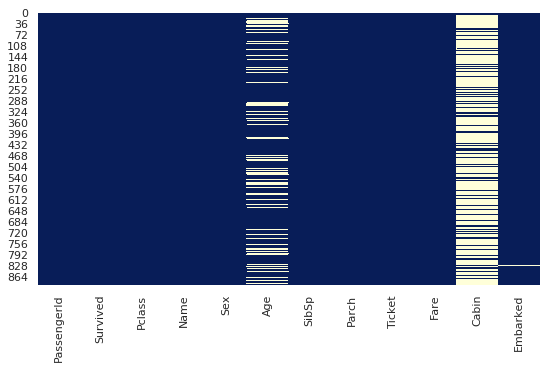

In [8]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [9]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

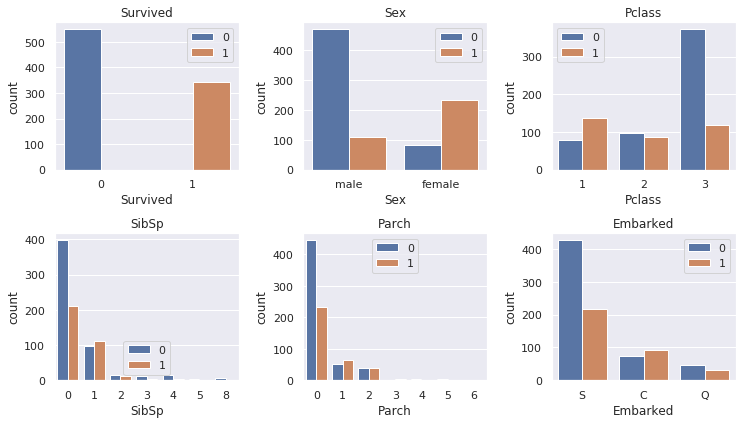

In [10]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend() 
        
plt.tight_layout() 

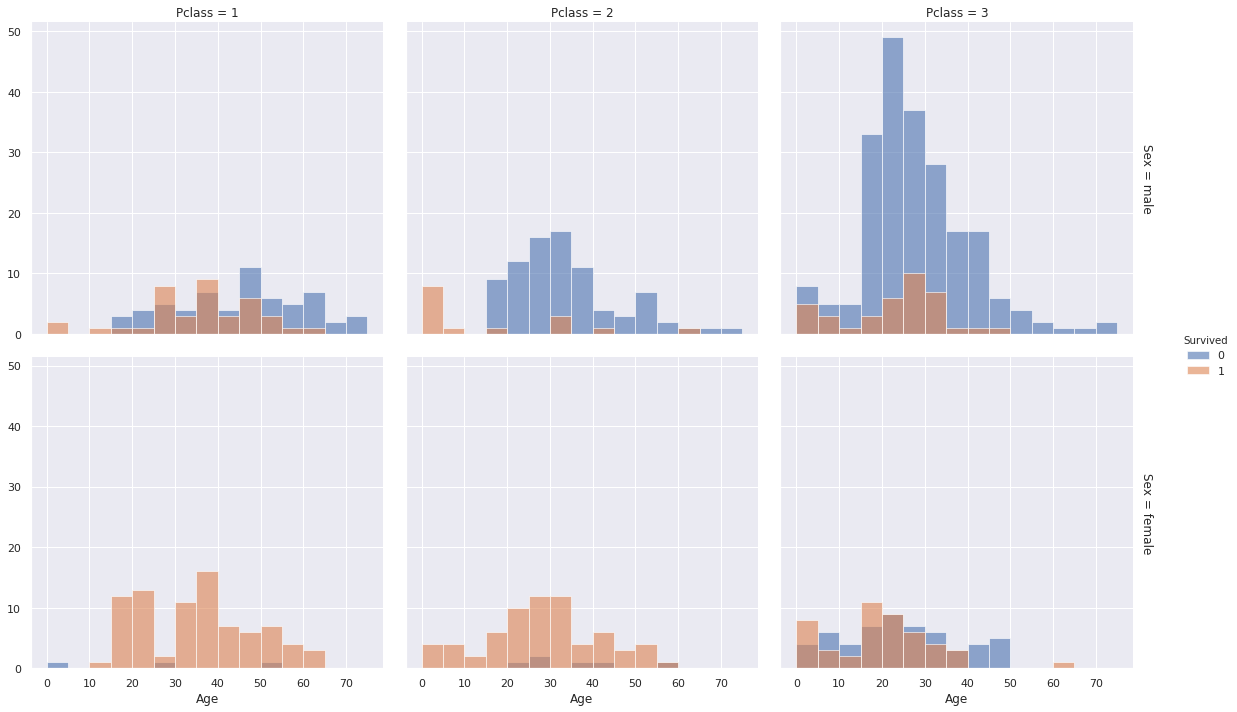

In [11]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True,height = 5, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

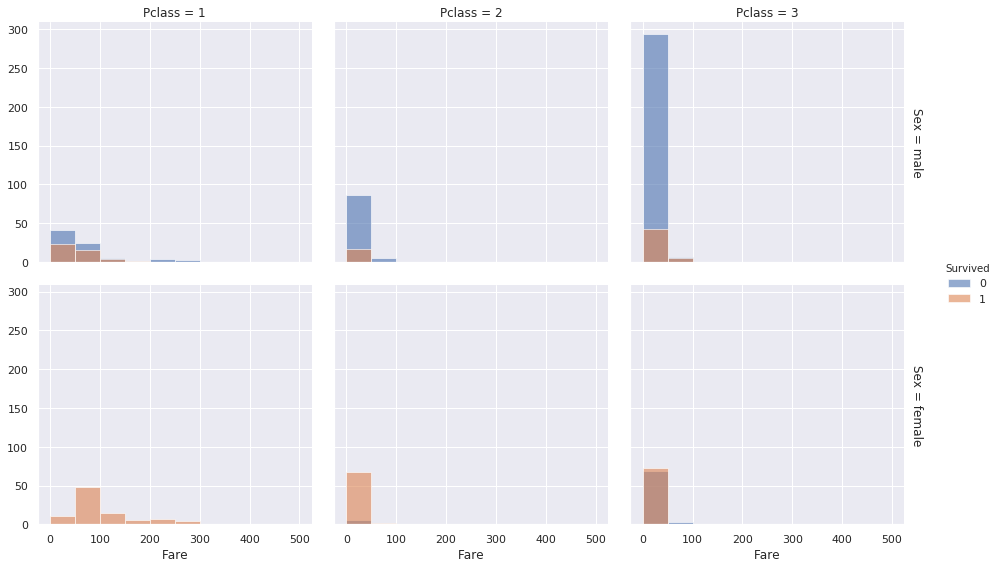

In [12]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height =4, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()

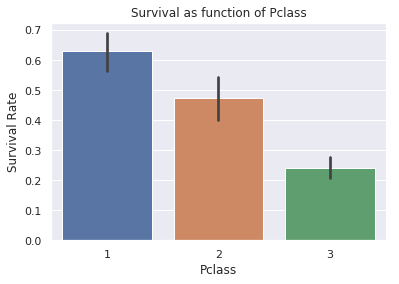

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

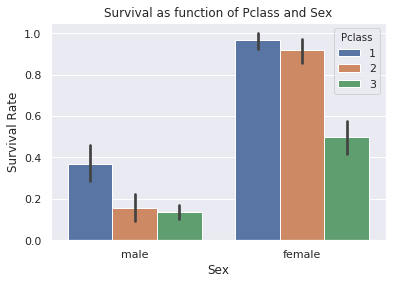

In [14]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

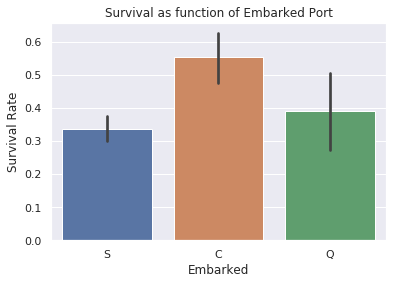

In [15]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

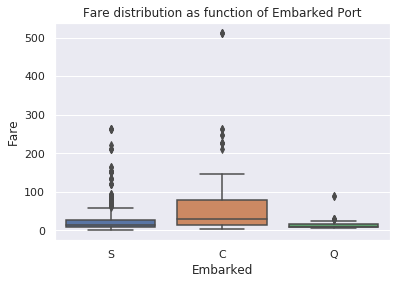

In [16]:
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

In [17]:
cm_surv = ["darkgrey" , "lightgreen"]

/home/ashish/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


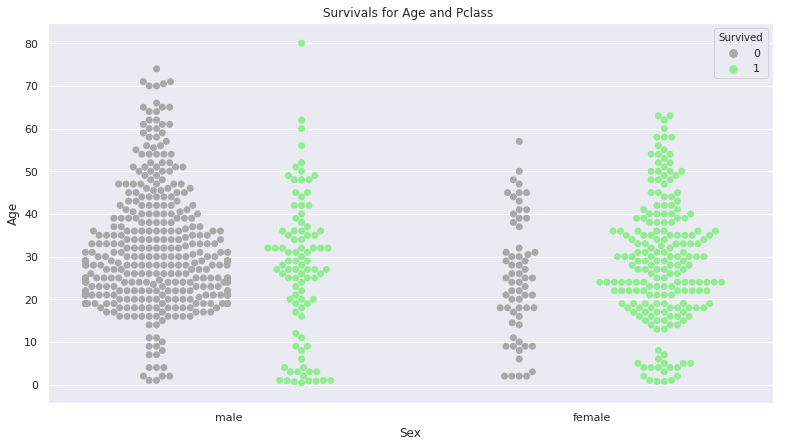

In [18]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Sex', y='Age', hue='Survived', split=True, data=df_train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

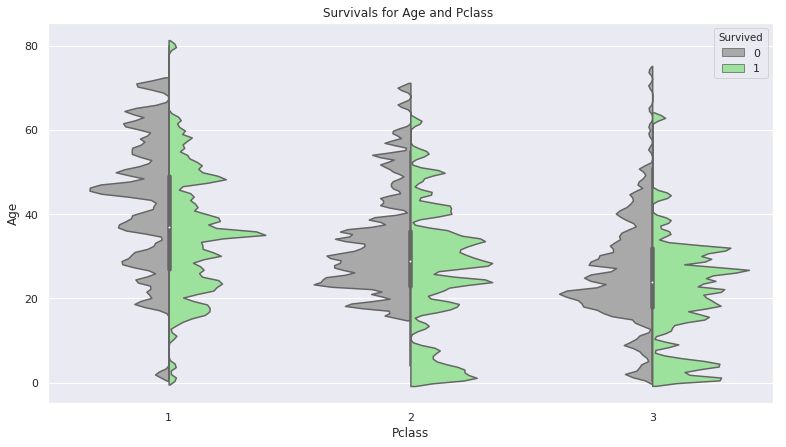

In [19]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df_train, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

/home/ashish/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ashish/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ashish/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


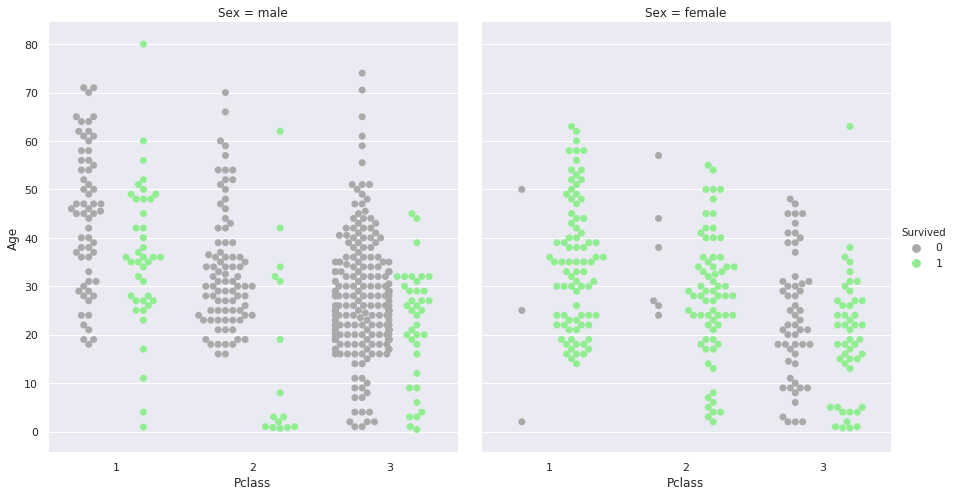

In [20]:


g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="swarm", split=True, palette=cm_surv, size=7, aspect=.9, s=7)



/home/ashish/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ashish/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


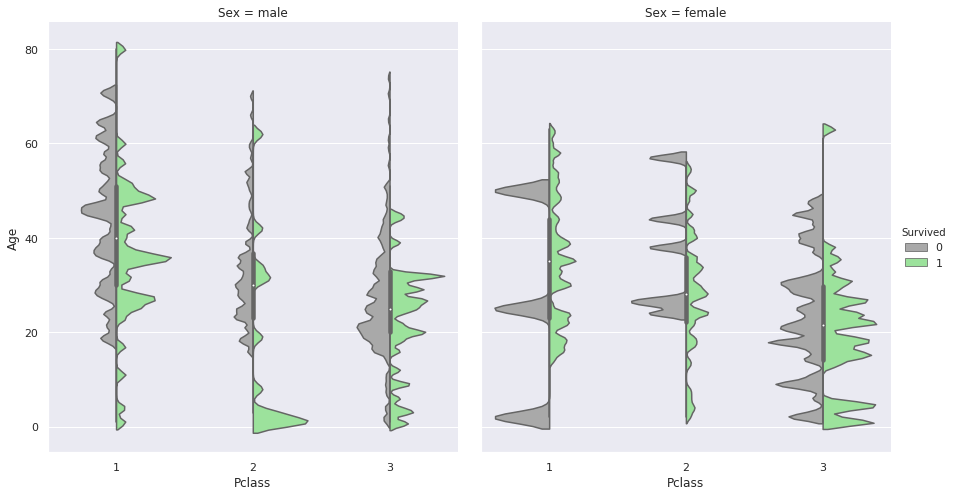

In [21]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="violin", split=True, bw=0.05, palette=cm_surv, size=7, aspect=.9, s=7)

In [22]:
for df in [df_train, df_test] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    df['Alone']=0
    df.loc[(df.FamilySize==0),'Alone'] = 1
    
    df['NameLen'] = df.Name.apply(lambda x : len(x)) 
    df['NameLenBin']=np.nan
    for i in range(20,0,-1):
        df.loc[ df['NameLen'] <= i*5, 'NameLenBin'] = i
    
    
    df['Title']=0
    df['Title']=df.Name.str.extract(r'([A-Za-z]+)\.') #lets extract the Salutations
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
print(df_train[['NameLen' , 'NameLenBin']].head(10))

   NameLen  NameLenBin
0       23         5.0
1       51        11.0
2       22         5.0
3       44         9.0
4       24         5.0
5       16         4.0
6       23         5.0
7       30         6.0
8       49        10.0
9       35         7.0


In [24]:
grps_namelenbin_survrate = df_train.groupby(['NameLenBin'])['Survived'].mean().to_frame()
grps_namelenbin_survrate

Survived
NameLenBin          
3.0         0.227273
4.0         0.230769
5.0         0.325581
6.0         0.364929
7.0         0.522727
8.0         0.477273
9.0         0.800000
10.0        0.800000
11.0        0.812500
12.0        0.600000
13.0        1.000000
14.0        1.000000
17.0        1.000000

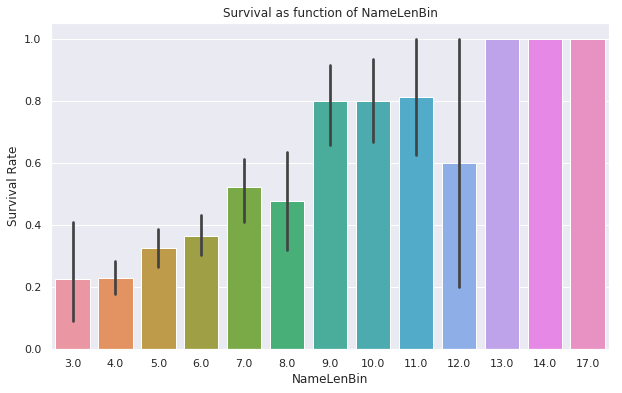

In [25]:
plt.subplots(figsize=(10,6))
sns.barplot(x='NameLenBin' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of NameLenBin")
plt.show()

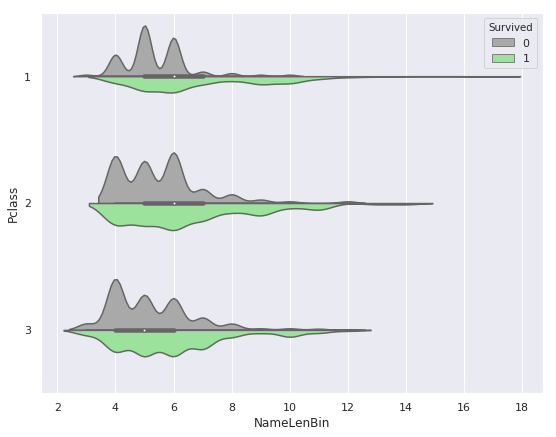

In [26]:
fig, ax = plt.subplots(figsize=(9,7))
sns.violinplot(x="NameLenBin", y="Pclass", data=df_train, hue='Survived', split=True, 
               orient="h", bw=0.2 , palette=cm_surv, ax=ax)
plt.show()

In [27]:
grps_title_survrate = df_train.groupby(['Title'])['Survived'].mean().to_frame()
grps_title_survrate

Survived
Title           
Master  0.575000
Miss    0.704301
Mr      0.162571
Mrs     0.795276
Other   0.111111

In [28]:
df_train.where(df_train['Title'] == 'Masters')

PassengerId  Survived  Pclass Name  Sex  Age  SibSp  Parch Ticket  Fare  \
0            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
1            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
2            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
3            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
4            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
5            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
6            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
7            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
8            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
9            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
10           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
11           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
12           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
13           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
14           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
15           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
16           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
17           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
18           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
19           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
20           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
21           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
22           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
23           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
24           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
25           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
26           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
27           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
28           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
29           NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
..           ...       ...     ...  ...  ...  ...    ...    ...    ...   ...   
861          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
862          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
863          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
864          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
865          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
866          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
867          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
868          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
869          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
870          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
871          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
872          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
873          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
874          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
875          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
876          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
877          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
878          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
879  

In [29]:
pd.crosstab(df_train.FamilySize,df_train.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ashish/anaconda3/lib/python3.6/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ashish/anaconda3/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [30]:
df['FamilySize'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  6, 10])

In [31]:
df['FamilySize']

0      0
1      1
2      0
3      0
4      2
5      0
6      0
7      2
8      0
9      2
10     0
11     0
12     1
13     1
14     1
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     0
23     1
24     4
25     1
26     1
27     0
28     0
29     2
      ..
388    0
389    4
390    0
391    1
392    2
393    0
394    4
395    1
396    0
397    2
398    0
399    0
400    0
401    1
402    1
403    0
404    1
405    0
406    1
407    2
408    0
409    2
410    0
411    1
412    0
413    0
414    0
415    0
416    0
417    2
Name: FamilySize, Length: 418, dtype: int64

In [32]:
df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  FamilySize  Alone  \
0  34.5      0      0   330911   7.8292   NaN        Q           0      1   
1  47.0      1      0   363272   7.0000   NaN        S           1      0   
2  62.0      0      0   240276   9.6875   NaN        Q           0      1   
3  27.0      0      0   315154   8.6625   NaN        S           0      1   
4  22.0      1      1  3101298  12.2875   NaN        S           2      0   

   NameLen  NameLenBin Title  
0       16         4.0    Mr  
1       32         7.0   Mrs  
2       25         5.0    Mr  
3       16         4.0    Mr  
4       44         9.0   Mrs

In [33]:
for df in [df_train, df_test]:

    # Title
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])

    # Age: use Title to fill missing values
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
    df = df.drop('Name', axis=1)

In [34]:
# Embarked
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode().iloc[0])

# Fare
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [35]:
for df in [df_train, df_test]:
    
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i        
    
    # convert Title to numerical
    df['Title'] = df['Title'].map( {'Other':0, 'Mr': 1, 'Master':2, 'Miss': 3, 'Mrs': 4 } )
    # fill na with maximum frequency mode
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
    df['Title'] = df['Title'].astype(int)

In [36]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

passenger_id = df_test_ml['PassengerId']

In [37]:


df_train_ml.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
Alone          891 non-null int64
NameLen        891 non-null int64
NameLenBin     891 non-null float64
Title          891 non-null int64
Age_bin        891 non-null float64
Fare_bin       891 non-null float64
dtypes: float64(5), int64(9), object(5)
memory usage: 132.3+ KB


In [38]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
Alone          418 non-null int64
NameLen        418 non-null int64
NameLenBin     418 non-null float64
Title          418 non-null int64
Age_bin        418 non-null float64
Fare_bin       418 non-null float64
dtypes: float64(5), int64(8), object(5)
memory usage: 58.9+ KB


In [39]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)

#df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
#df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [40]:
df_train_ml.dropna(inplace=True)

In [41]:
df_train_ml.head()

Survived  SibSp  Parch     Fare  FamilySize  Alone  NameLen  NameLenBin  \
0         0      1      0   7.2500           1      0       23         5.0   
1         1      1      0  71.2833           1      0       51        11.0   
2         1      0      0   7.9250           0      1       22         5.0   
3         1      1      0  53.1000           1      0       44         9.0   
4         0      0      0   8.0500           0      1       24         5.0   

   Title  Age_bin  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0      1      3.0         1           0           1         0         1  
1      4      4.0         0           0           0         0         0  
2      3      3.0         0           0           1         0         1  
3      4      4.0         0           0           1         0         0  
4      1      4.0         1           0           1         0         1

In [42]:


for df in [df_train_ml, df_test_ml]:
    df.drop(['NameLen'], axis=1, inplace=True)

    df.drop(['SibSp'], axis=1, inplace=True)
    df.drop(['Parch'], axis=1, inplace=True)
    df.drop(['Alone'], axis=1, inplace=True)



In [43]:
df_train_ml.head()

Survived     Fare  FamilySize  NameLenBin  Title  Age_bin  Sex_male  \
0         0   7.2500           1         5.0      1      3.0         1   
1         1  71.2833           1        11.0      4      4.0         0   
2         1   7.9250           0         5.0      3      3.0         0   
3         1  53.1000           1         9.0      4      4.0         0   
4         0   8.0500           0         5.0      1      4.0         1   

   Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0           0           1         0         1  
1           0           0         0         0  
2           0           1         0         1  
3           0           1         0         0  
4           0           1         0         1

In [44]:


df_test_ml.fillna(df_test_ml.mean(), inplace=True)
df_test_ml.head()



Fare  FamilySize  NameLenBin  Title  Age_bin  Sex_male  Embarked_Q  \
0   7.8292           0         4.0      1      4.0         1           1   
1   7.0000           1         7.0      4      5.0         0           0   
2   9.6875           0         5.0      1      7.0         1           1   
3   8.6625           0         4.0      1      3.0         1           0   
4  12.2875           2         9.0      4      3.0         0           0   

   Embarked_S  Pclass_2  Pclass_3  
0           0         0         1  
1           1         0         1  
2           0         1         0  
3           1         0         1  
4           1         0         1

In [45]:
# Standardize features by removing the mean and scaling to unit variance. (e.g. Gaussian with 0 mean and unit variance).

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop(['Survived'],axis=1))
scaled_features = scaler.transform(df_train_ml.drop(['Survived'],axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
#scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features) # , columns=df_test_ml.columns)

/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [46]:
df_train_ml_sc.head()

0         1         2         3         4         5         6  \
0 -0.502445  0.059160 -0.422786 -0.744033 -0.363116  0.737695 -0.307562   
1  0.786845  0.059160  2.751669  1.792701  0.385810 -1.355574 -0.307562   
2 -0.488854 -0.560975 -0.422786  0.947123 -0.363116 -1.355574 -0.307562   
3  0.420730  0.059160  1.693517  1.792701  0.385810 -1.355574 -0.307562   
4 -0.486337 -0.560975 -0.422786 -0.744033  0.385810  0.737695 -0.307562   

          7         8         9  
0  0.615838 -0.510152  0.902587  
1 -1.623803 -0.510152 -1.107926  
2  0.615838 -0.510152  0.902587  
3  0.615838 -0.510152 -1.107926  
4  0.615838 -0.510152  0.902587

In [47]:


df_train_ml.head()



Survived     Fare  FamilySize  NameLenBin  Title  Age_bin  Sex_male  \
0         0   7.2500           1         5.0      1      3.0         1   
1         1  71.2833           1        11.0      4      4.0         0   
2         1   7.9250           0         5.0      3      3.0         0   
3         1  53.1000           1         9.0      4      4.0         0   
4         0   8.0500           0         5.0      1      4.0         1   

   Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0           0           1         0         1  
1           0           0         0         0  
2           0           1         0         1  
3           0           1         0         0  
4           0           1         0         1

In [48]:
X = df_train_ml.drop('Survived', axis=1)
y = df_train_ml['Survived']
X_test = df_test_ml

X_sc = df_train_ml_sc
y_sc = df_train_ml['Survived']
X_test_sc = df_test_ml_sc


In [49]:
#Part 3: Optimization of Classifier parameters, Boosting

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


from sklearn.metrics import accuracy_score


/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ashish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81111111 0.78888889 0.78651685 0.7752809  0.82022472 0.82022472
 0.85393258 0.78651685 0.85393258 0.84090909]
0.8137538304392237


In [53]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc_sc = cross_val_score(svc, X_sc, y_sc, cv=10, scoring='accuracy')
print(scores_svc_sc)
print(scores_svc_sc.mean())

[0.82222222 0.83333333 0.79775281 0.86516854 0.83146067 0.82022472
 0.80898876 0.76404494 0.86516854 0.89772727]
0.8306091817046873


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [55]:
model = SVC()
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
rand_SVC = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100)
rand_SVC.fit(X_sc,y_sc)
score_rand_SVC = get_best_score(rand_SVC)

0.813692480359147
{'C': 4300.881685388148, 'gamma': 0.005982151694641569}
SVC(C=4300.881685388148, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005982151694641569,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [56]:


param_grid = {'C': [0.1,10, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X_sc,y_sc)
sc_svc = get_best_score(svc_grid)



Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.8338945005611672
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.4s finished


In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {'min_samples_split': [2,4,7,10]}
dtree_grid = GridSearchCV(dtree, param_grid, cv=10, refit=True, verbose=1)
dtree_grid.fit(X_sc,y_sc)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)
print(dtree_grid.best_estimator_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8047138047138047
{'min_samples_split': 10}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


In [58]:
from sklearn import tree
from sklearn.tree import export_graphviz

In [59]:
clf = tree.DecisionTreeClassifier()

In [60]:
clf = clf.fit(X_sc, y_sc)

In [61]:

dot_data = tree.export_graphviz(clf, out_file=None) 


In [62]:
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = export_graphviz(dot_data)  
graph 

TypeError: digraph Tree {
node [shape=box] ;
0 [label="X[3] <= -0.321\ngini = 0.473\nsamples = 891\nvalue = [549, 342]"] ;
1 [label="X[0] <= -0.12\ngini = 0.271\nsamples = 538\nvalue = [451, 87]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[5] <= -0.309\ngini = 0.18\nsamples = 399\nvalue = [359, 40]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
2 -> 3 ;
4 [label="X[2] <= -0.687\ngini = 0.177\nsamples = 398\nvalue = [359, 39]"] ;
2 -> 4 ;
5 [label="X[0] <= -0.489\ngini = 0.137\nsamples = 162\nvalue = [150, 12]"] ;
4 -> 5 ;
6 [label="X[0] <= -0.491\ngini = 0.066\nsamples = 88\nvalue = [85, 3]"] ;
5 -> 6 ;
7 [label="X[0] <= -0.503\ngini = 0.034\nsamples = 57\nvalue = [56, 1]"] ;
6 -> 7 ;
8 [label="X[0] <= -0.503\ngini = 0.062\nsamples = 31\nvalue = [30, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 21\nvalue = [21, 0]"] ;
8 -> 9 ;
10 [label="X[4] <= 0.011\ngini = 0.18\nsamples = 10\nvalue = [9, 1]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
10 -> 11 ;
12 [label="X[2] <= -1.216\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
10 -> 12 ;
13 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
12 -> 13 ;
14 [label="gini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
12 -> 14 ;
15 [label="gini = 0.0\nsamples = 26\nvalue = [26, 0]"] ;
7 -> 15 ;
16 [label="X[0] <= -0.49\ngini = 0.121\nsamples = 31\nvalue = [29, 2]"] ;
6 -> 16 ;
17 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
16 -> 17 ;
18 [label="X[7] <= -0.504\ngini = 0.064\nsamples = 30\nvalue = [29, 1]"] ;
16 -> 18 ;
19 [label="X[4] <= 0.011\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
18 -> 19 ;
20 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
19 -> 20 ;
21 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
19 -> 21 ;
22 [label="gini = 0.0\nsamples = 26\nvalue = [26, 0]"] ;
18 -> 22 ;
23 [label="X[0] <= -0.488\ngini = 0.214\nsamples = 74\nvalue = [65, 9]"] ;
5 -> 23 ;
24 [label="gini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
23 -> 24 ;
25 [label="X[4] <= 2.258\ngini = 0.157\nsamples = 70\nvalue = [64, 6]"] ;
23 -> 25 ;
26 [label="X[1] <= 0.369\ngini = 0.134\nsamples = 69\nvalue = [64, 5]"] ;
25 -> 26 ;
27 [label="X[0] <= -0.126\ngini = 0.094\nsamples = 61\nvalue = [58, 3]"] ;
26 -> 27 ;
28 [label="X[4] <= 0.76\ngini = 0.069\nsamples = 56\nvalue = [54, 2]"] ;
27 -> 28 ;
29 [label="X[0] <= -0.474\ngini = 0.039\nsamples = 50\nvalue = [49, 1]"] ;
28 -> 29 ;
30 [label="X[0] <= -0.476\ngini = 0.095\nsamples = 20\nvalue = [19, 1]"] ;
29 -> 30 ;
31 [label="gini = 0.0\nsamples = 11\nvalue = [11, 0]"] ;
30 -> 31 ;
32 [label="X[4] <= -0.738\ngini = 0.198\nsamples = 9\nvalue = [8, 1]"] ;
30 -> 32 ;
33 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
32 -> 33 ;
34 [label="X[4] <= 0.011\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
32 -> 34 ;
35 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
34 -> 35 ;
36 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
34 -> 36 ;
37 [label="gini = 0.0\nsamples = 30\nvalue = [30, 0]"] ;
29 -> 37 ;
38 [label="X[9] <= -0.103\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
28 -> 38 ;
39 [label="X[4] <= 1.509\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
38 -> 39 ;
40 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
39 -> 40 ;
41 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
39 -> 41 ;
42 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
38 -> 42 ;
43 [label="X[1] <= -0.251\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
27 -> 43 ;
44 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
43 -> 44 ;
45 [label="X[4] <= 0.76\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
43 -> 45 ;
46 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
45 -> 46 ;
47 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
45 -> 47 ;
48 [label="X[4] <= -0.738\ngini = 0.375\nsamples = 8\nvalue = [6, 2]"] ;
26 -> 48 ;
49 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
48 -> 49 ;
50 [label="X[6] <= 1.472\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
48 -> 50 ;
51 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
50 -> 51 ;
52 [label="X[0] <= -0.258\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
50 -> 52 ;
53 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
52 -> 53 ;
54 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
52 -> 54 ;
55 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
25 -> 55 ;
56 [label="X[7] <= -0.504\ngini = 0.203\nsamples = 236\nvalue = [209, 27]"] ;
4 -> 56 ;
57 [label="X[2] <= -0.158\ngini = 0.386\nsamples = 23\nvalue = [17, 6]"] ;
56 -> 57 ;
58 [label="X[4] <= 0.011\ngini = 0.231\nsamples = 15\nvalue = [13, 2]"] ;
57 -> 58 ;
59 [label="X[0] <= -0.381\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
58 -> 59 ;
60 [label="X[0] <= -0.492\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
59 -> 60 ;
61 [label="X[4] <= -0.738\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
60 -> 61 ;
62 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
61 -> 62 ;
63 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
61 -> 63 ;
64 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
60 -> 64 ;
65 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
59 -> 65 ;
66 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
58 -> 66 ;
67 [label="X[1] <= -0.251\ngini = 0.5\nsamples = 8\nvalue = [4, 4]"] ;
57 -> 67 ;
68 [label="X[0] <= -0.385\ngini = 0.49\nsamples = 7\nvalue = [3, 4]"] ;
67 -> 68 ;
69 [label="X[2] <= 0.371\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
68 -> 69 ;
70 [label="X[6] <= 1.472\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
69 -> 70 ;
71 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
70 -> 71 ;
72 [label="X[9] <= -0.103\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
70 -> 72 ;
73 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
72 -> 73 ;
74 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
72 -> 74 ;
75 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
69 -> 75 ;
76 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
68 -> 76 ;
77 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
67 -> 77 ;
78 [label="X[0] <= -0.382\ngini = 0.178\nsamples = 213\nvalue = [192, 21]"] ;
56 -> 78 ;
79 [label="X[2] <= -0.158\ngini = 0.213\nsamples = 173\nvalue = [152, 21]"] ;
78 -> 79 ;
80 [label="X[0] <= -0.513\ngini = 0.269\nsamples = 75\nvalue = [63, 12]"] ;
79 -> 80 ;
81 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
80 -> 81 ;
82 [label="X[0] <= -0.507\ngini = 0.287\nsamples = 69\nvalue = [57, 12]"] ;
80 -> 82 ;
83 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
82 -> 83 ;
84 [label="X[0] <= -0.506\ngini = 0.271\nsamples = 68\nvalue = [57, 11]"] ;
82 -> 84 ;
85 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
84 -> 85 ;
86 [label="X[0] <= -0.504\ngini = 0.285\nsamples = 64\nvalue = [53, 11]"] ;
84 -> 86 ;
87 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
86 -> 87 ;
88 [label="X[0] <= -0.493\ngini = 0.267\nsamples = 63\nvalue = [53, 10]"] ;
86 -> 88 ;
89 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
88 -> 89 ;
90 [label="X[0] <= -0.491\ngini = 0.293\nsamples = 56\nvalue = [46, 10]"] ;
88 -> 90 ;
91 [label="X[0] <= -0.492\ngini = 0.49\nsamples = 7\nvalue = [4, 3]"] ;
90 -> 91 ;
92 [label="X[4] <= -0.738\ngini = 0.444\nsamples = 6\nvalue = [4, 2]"] ;
91 -> 92 ;
93 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
92 -> 93 ;
94 [label="X[1] <= -0.251\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
92 -> 94 ;
95 [label="X[4] <= 0.011\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
94 -> 95 ;
96 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
95 -> 96 ;
97 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
95 -> 97 ;
98 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
94 -> 98 ;
99 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
91 -> 99 ;
100 [label="X[0] <= -0.489\ngini = 0.245\nsamples = 49\nvalue = [42, 7]"] ;
90 -> 100 ;
101 [label="gini = 0.0\nsamples = 12\nvalue = [12, 0]"] ;
100 -> 101 ;
102 [label="X[4] <= 1.509\ngini = 0.307\nsamples = 37\nvalue = [30, 7]"] ;
100 -> 102 ;
103 [label="X[4] <= 0.76\ngini = 0.327\nsamples = 34\nvalue = [27, 7]"] ;
102 -> 103 ;
104 [label="X[0] <= -0.46\ngini = 0.285\nsamples = 29\nvalue = [24, 5]"] ;
103 -> 104 ;
105 [label="X[4] <= -0.738\ngini = 0.133\nsamples = 14\nvalue = [13, 1]"] ;
104 -> 105 ;
106 [label="X[0] <= -0.485\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
105 -> 106 ;
107 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
106 -> 107 ;
108 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
106 -> 108 ;
109 [label="gini = 0.0\nsamples = 11\nvalue = [11, 0]"] ;
105 -> 109 ;
110 [label="X[4] <= 0.011\ngini = 0.391\nsamples = 15\nvalue = [11, 4]"] ;
104 -> 110 ;
111 [label="X[0] <= -0.427\ngini = 0.32\nsamples = 10\nvalue = [8, 2]"] ;
110 -> 111 ;
112 [label="X[8] <= 0.725\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
111 -> 112 ;
113 [label="X[4] <= -0.738\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
112 -> 113 ;
114 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
113 -> 114 ;
115 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
113 -> 115 ;
116 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
112 -> 116 ;
117 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
111 -> 117 ;
118 [label="X[0] <= -0.394\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
110 -> 118 ;
119 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
118 -> 119 ;
120 [label="gini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
118 -> 120 ;
121 [label="X[0] <= -0.488\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
103 -> 121 ;
122 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
121 -> 122 ;
123 [label="X[8] <= 0.725\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
121 -> 123 ;
124 [label="gini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
123 -> 124 ;
125 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
123 -> 125 ;
126 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
102 -> 126 ;
127 [label="X[2] <= 1.429\ngini = 0.167\nsamples = 98\nvalue = [89, 9]"] ;
79 -> 127 ;
128 [label="X[0] <= -0.489\ngini = 0.154\nsamples = 95\nvalue = [87, 8]"] ;
127 -> 128 ;
129 [label="X[0] <= -0.583\ngini = 0.054\nsamples = 36\nvalue = [35, 1]"] ;
128 -> 129 ;
130 [label="X[4] <= 0.011\ngini = 0.219\nsamples = 8\nvalue = [7, 1]"] ;
129 -> 130 ;
131 [label="X[4] <= -0.738\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
130 -> 131 ;
132 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
131 -> 132 ;
133 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
131 -> 133 ;
134 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
130 -> 134 ;
135 [label="gini = 0.0\nsamples = 28\nvalue = [28, 0]"] ;
129 -> 135 ;
136 [label="X[0] <= -0.483\ngini = 0.209\nsamples = 59\nvalue = [52, 7]"] ;
128 -> 136 ;
137 [label="X[0] <= -0.486\ngini = 0.351\nsamples = 22\nvalue = [17, 5]"] ;
136 -> 137 ;
138 [label="X[4] <= -0.738\ngini = 0.308\nsamples = 21\nvalue = [17, 4]"] ;
137 -> 138 ;
139 [label="X[1] <= -0.251\ngini = 0.49\nsamples = 7\nvalue = [4, 3]"] ;
138 -> 139 ;
140 [label="X[0] <= -0.488\ngini = 0.444\nsamples = 6\nvalue = [4, 2]"] ;
139 -> 140 ;
141 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
140 -> 141 ;
142 [label="gini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
140 -> 142 ;
143 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
139 -> 143 ;
144 [label="X[2] <= 0.371\ngini = 0.133\nsamples = 14\nvalue = [13, 1]"] ;
138 -> 144 ;
145 [label="gini = 0.0\nsamples = 11\nvalue = [11, 0]"] ;
144 -> 145 ;
146 [label="gini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
144 -> 146 ;
147 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
137 -> 147 ;
148 [label="X[2] <= 0.371\ngini = 0.102\nsamples = 37\nvalue = [35, 2]"] ;
136 -> 148 ;
149 [label="X[0] <= -0.457\ngini = 0.128\nsamples = 29\nvalue = [27, 2]"] ;
148 -> 149 ;
150 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
149 -> 150 ;
151 [label="X[0] <= -0.454\ngini = 0.159\nsamples = 23\nvalue = [21, 2]"] ;
149 -> 151 ;
152 [label="X[4] <= 0.011\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
151 -> 152 ;
153 [label="gini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
152 -> 153 ;
154 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
152 -> 154 ;
155 [label="X[4] <= 0.011\ngini = 0.1\nsamples = 19\nvalue = [18, 1]"] ;
151 -> 155 ;
156 [label="gini = 0.0\nsamples = 13\nvalue = [13, 0]"] ;
155 -> 156 ;
157 [label="X[0] <= -0.391\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
155 -> 157 ;
158 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
157 -> 158 ;
159 [label="X[4] <= 0.76\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
157 -> 159 ;
160 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
159 -> 160 ;
161 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
159 -> 161 ;
162 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
148 -> 162 ;
163 [label="X[8] <= 0.725\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
127 -> 163 ;
164 [label="X[0] <= -0.493\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
163 -> 164 ;
165 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
164 -> 165 ;
166 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
164 -> 166 ;
167 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
163 -> 167 ;
168 [label="gini = 0.0\nsamples = 40\nvalue = [40, 0]"] ;
78 -> 168 ;
169 [label="X[2] <= 0.371\ngini = 0.448\nsamples = 139\nvalue = [92, 47]"] ;
1 -> 169 ;
170 [label="X[8] <= 0.725\ngini = 0.408\nsamples = 119\nvalue = [85, 34]"] ;
169 -> 170 ;
171 [label="X[4] <= 1.509\ngini = 0.434\nsamples = 107\nvalue = [73, 34]"] ;
170 -> 171 ;
172 [label="X[1] <= 1.609\ngini = 0.469\nsamples = 85\nvalue = [53, 32]"] ;
171 -> 172 ;
173 [label="X[9] <= -0.103\ngini = 0.489\nsamples = 75\nvalue = [43, 32]"] ;
172 -> 173 ;
174 [label="X[0] <= -0.032\ngini = 0.479\nsamples = 68\nvalue = [41, 27]"] ;
173 -> 174 ;
175 [label="X[0] <= -0.039\ngini = 0.492\nsamples = 16\nvalue = [7, 9]"] ;
174 -> 175 ;
176 [label="X[2] <= -0.158\ngini = 0.497\nsamples = 13\nvalue = [7, 6]"] ;
175 -> 176 ;
177 [label="X[0] <= -0.116\ngini = 0.463\nsamples = 11\nvalue = [7, 4]"] ;
176 -> 177 ;
178 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
177 -> 178 ;
179 [label="X[0] <= -0.063\ngini = 0.42\nsamples = 10\nvalue = [7, 3]"] ;
177 -> 179 ;
180 [label="X[0] <= -0.102\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
179 -> 180 ;
181 [label="X[4] <= 0.76\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
180 -> 181 ;
182 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
181 -> 182 ;
183 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
181 -> 183 ;
184 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
180 -> 184 ;
185 [label="X[2] <= -0.687\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
179 -> 185 ;
186 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
185 -> 186 ;
187 [label="X[4] <= 0.011\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
185 -> 187 ;
188 [label="X[7] <= -0.504\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
187 -> 188 ;
189 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
188 -> 189 ;
190 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
188 -> 190 ;
191 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
187 -> 191 ;
192 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
176 -> 192 ;
193 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
175 -> 193 ;
194 [label="X[1] <= -0.251\ngini = 0.453\nsamples = 52\nvalue = [34, 18]"] ;
174 -> 194 ;
195 [label="X[0] <= 6.8\ngini = 0.351\nsamples = 22\nvalue = [17, 5]"] ;
194 -> 195 ;
196 [label="X[0] <= 0.097\ngini = 0.308\nsamples = 21\nvalue = [17, 4]"] ;
195 -> 196 ;
197 [label="X[2] <= -0.687\ngini = 0.49\nsamples = 7\nvalue = [4, 3]"] ;
196 -> 197 ;
198 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
197 -> 198 ;
199 [label="X[4] <= 0.011\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
197 -> 199 ;
200 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
199 -> 200 ;
201 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
199 -> 201 ;
202 [label="X[4] <= 0.011\ngini = 0.133\nsamples = 14\nvalue = [13, 1]"] ;
196 -> 202 ;
203 [label="X[0] <= 0.921\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
202 -> 203 ;
204 [label="X[7] <= -0.504\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
203 -> 204 ;
205 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
204 -> 205 ;
206 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
204 -> 206 ;
207 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
203 -> 207 ;
208 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
202 -> 208 ;
209 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
195 -> 209 ;
210 [label="X[0] <= 2.242\ngini = 0.491\nsamples = 30\nvalue = [17, 13]"] ;
194 -> 210 ;
211 [label="X[0] <= 1.676\ngini = 0.499\nsamples = 27\nvalue = [14, 13]"] ;
210 -> 211 ;
212 [label="X[0] <= 0.541\ngini = 0.493\nsamples = 25\nvalue = [14, 11]"] ;
211 -> 212 ;
213 [label="X[4] <= -0.738\ngini = 0.496\nsamples = 11\nvalue = [5, 6]"] ;
212 -> 213 ;
214 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
213 -> 214 ;
215 [label="X[4] <= 0.011\ngini = 0.48\nsamples = 10\nvalue = [4, 6]"] ;
213 -> 215 ;
216 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
215 -> 216 ;
217 [label="X[1] <= 0.369\ngini = 0.5\nsamples = 8\nvalue = [4, 4]"] ;
215 -> 217 ;
218 [label="X[0] <= 0.488\ngini = 0.49\nsamples = 7\nvalue = [4, 3]"] ;
217 -> 218 ;
219 [label="X[4] <= 0.76\ngini = 0.444\nsamples = 6\nvalue = [4, 2]"] ;
218 -> 219 ;
220 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
219 -> 220 ;
221 [label="X[0] <= 0.443\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
219 -> 221 ;
222 [label="X[2] <= -0.158\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
221 -> 222 ;
223 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
222 -> 223 ;
224 [label="X[0] <= 0.404\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
222 -> 224 ;
225 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
224 -> 225 ;
226 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
224 -> 226 ;
227 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
221 -> 227 ;
228 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
218 -> 228 ;
229 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
217 -> 229 ;
230 [label="X[0] <= 1.089\ngini = 0.459\nsamples = 14\nvalue = [9, 5]"] ;
212 -> 230 ;
231 [label="X[7] <= -0.504\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
230 -> 231 ;
232 [label="X[0] <= 0.951\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
231 -> 232 ;
233 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
232 -> 233 ;
234 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
232 -> 234 ;
235 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
231 -> 235 ;
236 [label="X[4] <= 0.76\ngini = 0.49\nsamples = 7\nvalue = [3, 4]"] ;
230 -> 236 ;
237 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
236 -> 237 ;
238 [label="X[0] <= 1.155\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
236 -> 238 ;
239 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
238 -> 239 ;
240 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
238 -> 240 ;
241 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
211 -> 241 ;
242 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
210 -> 242 ;
243 [label="X[4] <= 0.011\ngini = 0.408\nsamples = 7\nvalue = [2, 5]"] ;
173 -> 243 ;
244 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
243 -> 244 ;
245 [label="gini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
243 -> 245 ;
246 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
172 -> 246 ;
247 [label="X[0] <= -0.032\ngini = 0.165\nsamples = 22\nvalue = [20, 2]"] ;
171 -> 247 ;
248 [label="X[4] <= 2.258\ngini = 0.346\nsamples = 9\nvalue = [7, 2]"] ;
247 -> 248 ;
249 [label="X[3] <= -1.167\ngini = 0.444\nsamples = 6\nvalue = [4, 2]"] ;
248 -> 249 ;
250 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
249 -> 250 ;
251 [label="X[7] <= -0.504\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
249 -> 251 ;
252 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
251 -> 252 ;
253 [label="X[2] <= -0.158\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
251 -> 253 ;
254 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
253 -> 254 ;
255 [label="X[0] <= -0.074\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
253 -> 255 ;
256 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
255 -> 256 ;
257 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
255 -> 257 ;
258 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
248 -> 258 ;
259 [label="gini = 0.0\nsamples = 13\nvalue = [13, 0]"] ;
247 -> 259 ;
260 [label="gini = 0.0\nsamples = 12\nvalue = [12, 0]"] ;
170 -> 260 ;
261 [label="X[8] <= 0.725\ngini = 0.455\nsamples = 20\nvalue = [7, 13]"] ;
169 -> 261 ;
262 [label="X[4] <= -0.738\ngini = 0.401\nsamples = 18\nvalue = [5, 13]"] ;
261 -> 262 ;
263 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
262 -> 263 ;
264 [label="X[1] <= -0.251\ngini = 0.36\nsamples = 17\nvalue = [4, 13]"] ;
262 -> 264 ;
265 [label="X[0] <= -0.102\ngini = 0.426\nsamples = 13\nvalue = [4, 9]"] ;
264 -> 265 ;
266 [label="X[4] <= 0.76\ngini = 0.219\nsamples = 8\nvalue = [1, 7]"] ;
265 -> 266 ;
267 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
266 -> 267 ;
268 [label="X[0] <= -0.116\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
266 -> 268 ;
269 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
268 -> 269 ;
270 [label="X[2] <= 1.164\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
268 -> 270 ;
271 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
270 -> 271 ;
272 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
270 -> 272 ;
273 [label="X[4] <= 1.135\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
265 -> 273 ;
274 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
273 -> 274 ;
275 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
273 -> 275 ;
276 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
264 -> 276 ;
277 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
261 -> 277 ;
278 [label="X[9] <= -0.103\ngini = 0.401\nsamples = 353\nvalue = [98, 255]"] ;
0 -> 278 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
279 [label="X[0] <= -0.067\ngini = 0.095\nsamples = 181\nvalue = [9, 172]"] ;
278 -> 279 ;
280 [label="X[0] <= -0.08\ngini = 0.171\nsamples = 74\nvalue = [7, 67]"] ;
279 -> 280 ;
281 [label="X[2] <= 3.016\ngini = 0.151\nsamples = 73\nvalue = [6, 67]"] ;
280 -> 281 ;
282 [label="X[4] <= 1.509\ngini = 0.131\nsamples = 71\nvalue = [5, 66]"] ;
281 -> 282 ;
283 [label="X[2] <= 0.9\ngini = 0.112\nsamples = 67\nvalue = [4, 63]"] ;
282 -> 283 ;
284 [label="X[4] <= 0.011\ngini = 0.044\nsamples = 44\nvalue = [1, 43]"] ;
283 -> 284 ;
285 [label="gini = 0.0\nsamples = 30\nvalue = [0, 30]"] ;
284 -> 285 ;
286 [label="X[3] <= 1.37\ngini = 0.133\nsamples = 14\nvalue = [1, 13]"] ;
284 -> 286 ;
287 [label="X[2] <= -0.687\ngini = 0.219\nsamples = 8\nvalue = [1, 7]"] ;
286 -> 287 ;
288 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
287 -> 288 ;
289 [label="X[0] <= -0.306\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
287 -> 289 ;
290 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
289 -> 290 ;
291 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
289 -> 291 ;
292 [label="gini = 0.0\nsamples = 6\nvalue = [0, 6]"] ;
286 -> 292 ;
293 [label="X[3] <= 1.37\ngini = 0.227\nsamples = 23\nvalue = [3, 20]"] ;
283 -> 293 ;
294 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
293 -> 294 ;
295 [label="X[0] <= -0.126\ngini = 0.165\nsamples = 22\nvalue = [2, 20]"] ;
293 -> 295 ;
296 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
295 -> 296 ;
297 [label="X[2] <= 1.429\ngini = 0.245\nsamples = 14\nvalue = [2, 12]"] ;
295 -> 297 ;
298 [label="X[0] <= -0.107\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
297 -> 298 ;
299 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
298 -> 299 ;
300 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
298 -> 300 ;
301 [label="X[4] <= 0.76\ngini = 0.153\nsamples = 12\nvalue = [1, 11]"] ;
297 -> 301 ;
302 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
301 -> 302 ;
303 [label="X[0] <= -0.122\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
301 -> 303 ;
304 [label="X[2] <= 2.223\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
303 -> 304 ;
305 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
304 -> 305 ;
306 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
304 -> 306 ;
307 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
303 -> 307 ;
308 [label="X[2] <= -0.687\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
282 -> 308 ;
309 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
308 -> 309 ;
310 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
308 -> 310 ;
311 [label="X[2] <= 3.81\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
281 -> 311 ;
312 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
311 -> 312 ;
313 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
311 -> 313 ;
314 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
280 -> 314 ;
315 [label="X[1] <= 0.989\ngini = 0.037\nsamples = 107\nvalue = [2, 105]"] ;
279 -> 315 ;
316 [label="gini = 0.0\nsamples = 91\nvalue = [0, 91]"] ;
315 -> 316 ;
317 [label="X[0] <= 2.085\ngini = 0.219\nsamples = 16\nvalue = [2, 14]"] ;
315 -> 317 ;
318 [label="gini = 0.0\nsamples = 9\nvalue = [0, 9]"] ;
317 -> 318 ;
319 [label="X[0] <= 3.519\ngini = 0.408\nsamples = 7\nvalue = [2, 5]"] ;
317 -> 319 ;
320 [label="X[3] <= 0.524\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
319 -> 320 ;
321 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
320 -> 321 ;
322 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
320 -> 322 ;
323 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
319 -> 323 ;
324 [label="X[1] <= 1.609\ngini = 0.499\nsamples = 172\nvalue = [89, 83]"] ;
278 -> 324 ;
325 [label="X[4] <= -1.487\ngini = 0.47\nsamples = 127\nvalue = [48, 79]"] ;
324 -> 325 ;
326 [label="X[0] <= -0.184\ngini = 0.236\nsamples = 22\nvalue = [3, 19]"] ;
325 -> 326 ;
327 [label="X[0] <= -0.431\ngini = 0.172\nsamples = 21\nvalue = [2, 19]"] ;
326 -> 327 ;
328 [label="X[2] <= 0.371\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
327 -> 328 ;
329 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
328 -> 329 ;
330 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
328 -> 330 ;
331 [label="X[2] <= -0.158\ngini = 0.1\nsamples = 19\nvalue = [1, 18]"] ;
327 -> 331 ;
332 [label="X[0] <= -0.36\ngini = 0.278\nsamples = 6\nvalue = [1, 5]"] ;
331 -> 332 ;
333 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
332 -> 333 ;
334 [label="X[0] <= -0.301\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
332 -> 334 ;
335 [label="X[3] <= 0.524\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
334 -> 335 ;
336 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
335 -> 336 ;
337 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
335 -> 337 ;
338 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
334 -> 338 ;
339 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
331 -> 339 ;
340 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
326 -> 340 ;
341 [label="X[7] <= -0.504\ngini = 0.49\nsamples = 105\nvalue = [45, 60]"] ;
325 -> 341 ;
342 [label="X[4] <= 0.011\ngini = 0.42\nsamples = 50\nvalue = [15, 35]"] ;
341 -> 342 ;
343 [label="X[2] <= -0.158\ngini = 0.369\nsamples = 41\nvalue = [10, 31]"] ;
342 -> 343 ;
344 [label="X[0] <= -0.487\ngini = 0.48\nsamples = 20\nvalue = [8, 12]"] ;
343 -> 344 ;
345 [label="X[1] <= 0.059\ngini = 0.375\nsamples = 12\nvalue = [3, 9]"] ;
344 -> 345 ;
346 [label="X[2] <= -0.687\ngini = 0.298\nsamples = 11\nvalue = [2, 9]"] ;
345 -> 346 ;
347 [label="X[4] <= -0.738\ngini = 0.408\nsamples = 7\nvalue = [2, 5]"] ;
346 -> 347 ;
348 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
347 -> 348 ;
349 [label="X[0] <= -0.491\ngini = 0.444\nsamples = 6\nvalue = [2, 4]"] ;
347 -> 349 ;
350 [label="gini = 0.48\nsamples = 5\nvalue = [2, 3]"] ;
349 -> 350 ;
351 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
349 -> 351 ;
352 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
346 -> 352 ;
353 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
345 -> 353 ;
354 [label="X[0] <= -0.278\ngini = 0.469\nsamples = 8\nvalue = [5, 3]"] ;
344 -> 354 ;
355 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
354 -> 355 ;
356 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
354 -> 356 ;
357 [label="X[0] <= -0.494\ngini = 0.172\nsamples = 21\nvalue = [2, 19]"] ;
343 -> 357 ;
358 [label="X[2] <= 0.371\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
357 -> 358 ;
359 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
358 -> 359 ;
360 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
358 -> 360 ;
361 [label="gini = 0.0\nsamples = 18\nvalue = [0, 18]"] ;
357 -> 361 ;
362 [label="X[0] <= -0.498\ngini = 0.494\nsamples = 9\nvalue = [5, 4]"] ;
342 -> 362 ;
363 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
362 -> 363 ;
364 [label="X[2] <= 0.9\ngini = 0.408\nsamples = 7\nvalue = [5, 2]"] ;
362 -> 364 ;
365 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
364 -> 365 ;
366 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
364 -> 366 ;
367 [label="X[0] <= -0.493\ngini = 0.496\nsamples = 55\nvalue = [30, 25]"] ;
341 -> 367 ;
368 [label="X[2] <= 0.371\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
367 -> 368 ;
369 [label="X[0] <= -0.497\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
368 -> 369 ;
370 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
369 -> 370 ;
371 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
369 -> 371 ;
372 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
368 -> 372 ;
373 [label="X[3] <= 1.37\ngini = 0.487\nsamples = 50\nvalue = [29, 21]"] ;
367 -> 373 ;
374 [label="X[2] <= -0.158\ngini = 0.417\nsamples = 27\nvalue = [19, 8]"] ;
373 -> 374 ;
375 [label="X[0] <= -0.491\ngini = 0.497\nsamples = 13\nvalue = [7, 6]"] ;
374 -> 375 ;
376 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
375 -> 376 ;
377 [label="X[0] <= -0.45\ngini = 0.463\nsamples = 11\nvalue = [7, 4]"] ;
375 -> 377 ;
378 [label="X[0] <= -0.481\ngini = 0.346\nsamples = 9\nvalue = [7, 2]"] ;
377 -> 378 ;
379 [label="X[0] <= -0.489\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
378 -> 379 ;
380 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
379 -> 380 ;
381 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
379 -> 381 ;
382 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
378 -> 382 ;
383 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
377 -> 383 ;
384 [label="X[2] <= 1.694\ngini = 0.245\nsamples = 14\nvalue = [12, 2]"] ;
374 -> 384 ;
385 [label="X[0] <= -0.49\ngini = 0.142\nsamples = 13\nvalue = [12, 1]"] ;
384 -> 385 ;
386 [label="X[0] <= -0.491\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
385 -> 386 ;
387 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
386 -> 387 ;
388 [label="X[4] <= -0.738\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
386 -> 388 ;
389 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
388 -> 389 ;
390 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
388 -> 390 ;
391 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
385 -> 391 ;
392 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
384 -> 392 ;
393 [label="X[2] <= 0.9\ngini = 0.491\nsamples = 23\nvalue = [10, 13]"] ;
373 -> 393 ;
394 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
393 -> 394 ;
395 [label="X[0] <= -0.431\ngini = 0.494\nsamples = 18\nvalue = [10, 8]"] ;
393 -> 395 ;
396 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
395 -> 396 ;
397 [label="X[0] <= -0.294\ngini = 0.498\nsamples = 15\nvalue = [7, 8]"] ;
395 -> 397 ;
398 [label="X[0] <= -0.343\ngini = 0.42\nsamples = 10\nvalue = [3, 7]"] ;
397 -> 398 ;
399 [label="X[0] <= -0.391\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
398 -> 399 ;
400 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
399 -> 400 ;
401 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
399 -> 401 ;
402 [label="X[4] <= 0.011\ngini = 0.245\nsamples = 7\nvalue = [1, 6]"] ;
398 -> 402 ;
403 [label="X[2] <= 2.487\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
402 -> 403 ;
404 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
403 -> 404 ;
405 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
403 -> 405 ;
406 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
402 -> 406 ;
407 [label="X[0] <= -0.238\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
397 -> 407 ;
408 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
407 -> 408 ;
409 [label="X[2] <= 2.487\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
407 -> 409 ;
410 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
409 -> 410 ;
411 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
409 -> 411 ;
412 [label="X[0] <= -0.356\ngini = 0.162\nsamples = 45\nvalue = [41, 4]"] ;
324 -> 412 ;
413 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
412 -> 413 ;
414 [label="X[2] <= 2.752\ngini = 0.127\nsamples = 44\nvalue = [41, 3]"] ;
412 -> 414 ;
415 [label="X[1] <= 2.85\ngini = 0.091\nsamples = 42\nvalue = [40, 2]"] ;
414 -> 415 ;
416 [label="gini = 0.0\nsamples = 25\nvalue = [25, 0]"] ;
415 -> 416 ;
417 [label="X[0] <= 0.14\ngini = 0.208\nsamples = 17\nvalue = [15, 2]"] ;
415 -> 417 ;
418 [label="X[0] <= -0.018\ngini = 0.375\nsamples = 8\nvalue = [6, 2]"] ;
417 -> 418 ;
419 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
418 -> 419 ;
420 [label="X[2] <= 0.9\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
418 -> 420 ;
421 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
420 -> 421 ;
422 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
420 -> 422 ;
423 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
417 -> 423 ;
424 [label="X[0] <= -0.018\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
414 -> 424 ;
425 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
424 -> 425 ;
426 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
424 -> 426 ;
} is not an estimator instance.

In [63]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_sc, y_sc)
g =tree.export_graphviz(clf, out_file='tree.dot')                



In [64]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

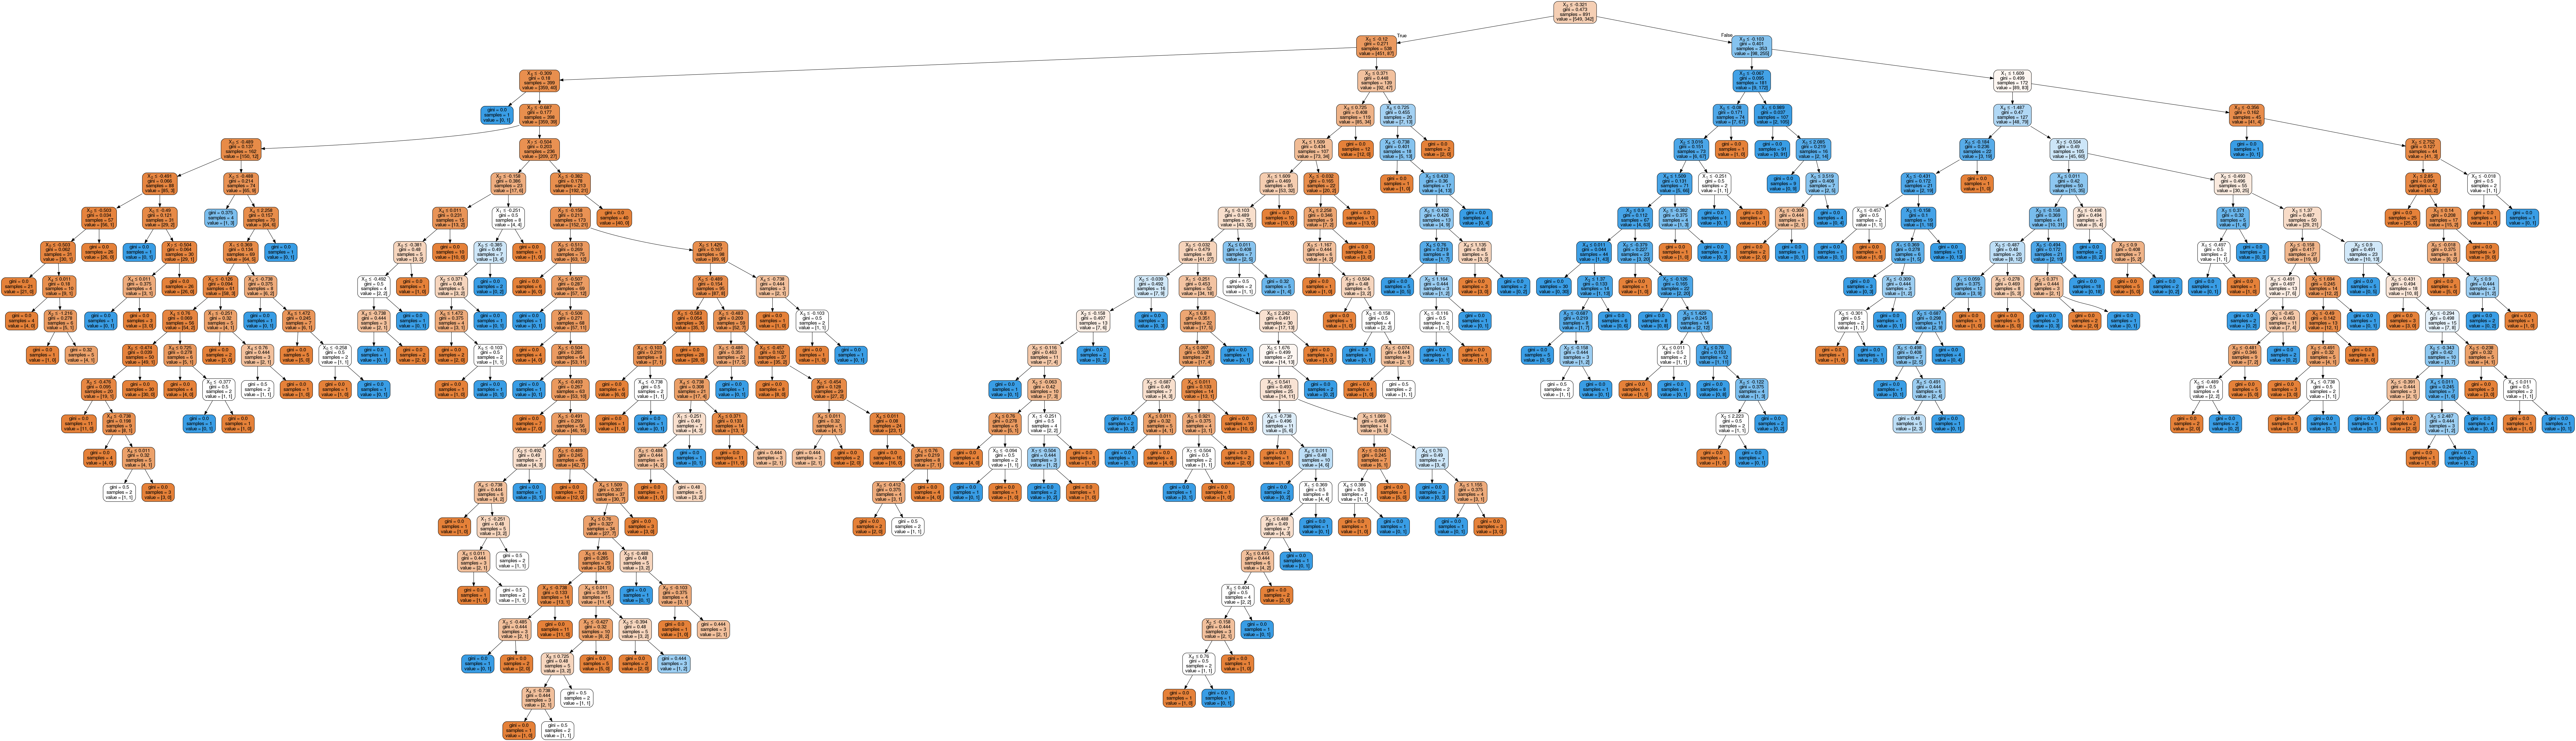

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_sc,y_sc)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.81111111 0.83333333 0.76404494 0.86516854 0.82022472 0.78651685
 0.84269663 0.80898876 0.86516854 0.86363636]
0.8260889796844854


In [67]:
svc = SVC(gamma = 0.02, C = 863)
scores_svc_sc = cross_val_score(svc, X_sc, y_sc, cv=10, scoring='accuracy')
print(scores_svc_sc)
print(scores_svc_sc.mean())

[0.77777778 0.84444444 0.7752809  0.82022472 0.79775281 0.82022472
 0.79775281 0.73033708 0.84269663 0.86363636]
0.8070128248779934


In [68]:
model = SVC()
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
rand_SVC = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100)
rand_SVC.fit(X_sc,y_sc)
score_rand_SVC = get_best_score(rand_SVC)

0.8092031425364759
{'C': 3962.7461970474105, 'gamma': 0.007300066349695389}
SVC(C=3962.7461970474105, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.007300066349695389,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],  
              'min_samples_split': [3, 5, 6, 7]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_sc,y_sc)
sc_rf = get_best_score(rf_grid)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
0.8496071829405163
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 5}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   27.6s finished


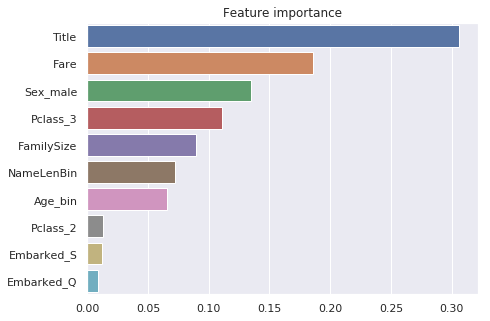

In [72]:
plot_feature_importances(rf_grid, X.columns)

In [73]:
pred_all_rf = rf_grid.predict(X_test_sc)

sub_rf = pd.DataFrame()
sub_rf['PassengerId'] = df_test['PassengerId']
sub_rf['Survived'] = pred_all_rf
sub_rf.to_csv('rf.csv',index=False)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()

param_grid = {'n_estimators': [30, 50, 100], 
              'min_samples_split': [3, 4, 5, 6, 7, 8],
              'max_depth': [3, 4, 5, 6]}
gbdt_grid = GridSearchCV(gbdt, param_grid, cv=10, refit=True, verbose=1)
gbdt_grid.fit(X_sc,y_sc)
sc_gbdt = get_best_score(gbdt_grid)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.8462401795735129
{'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.6min finished
